In [69]:
import pandas as pd
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
import matplotlib as mpl
from tkinter import filedialog
from pandas import DataFrame
import seaborn as sns

In [50]:
#pip install matplotlib --force-reinstall --user

In [51]:
##pip install pathlib

# Data Introduction 
The dataset was sourced from Medicaid.gov and it contains the performance rates on frequently reported health care quality measures in the CMS Medicaid/CHIP Child and Adult Core Sets, for FFY 2019 reporting.

This dataset has **3,096 entries** and **19 columns or features**. Other than the 'Notes' column which most likely is an optionl field for submittors, there are no misisng values in this dataset. However, some states can have more entries in this dataset depending on the applicable programs for each state. 



## Features and Unique Values


In [70]:
medicaid_file = "C:/Users/Nicole/Desktop/2019_Child_and_Adult_Health_Care_Quality_Measures_Quality.csv"
medicaid = pd.read_csv(medicaid_file)
medicaid

,State,Domain,Reporting Program,Measure Name,Measure Abbreviation,Measure Type,Rate Definition,FFY,Population,Methodology,State Rate,Number of States Reporting,Median,Bottom Quartile,Top Quartile,Notes,Source,State Specific Comments,Rate Used in Calculating State Mean and Median
0,Wyoming,Behavioral Health Care,Adult Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-AD,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,Medicaid & Dual Eligibles,Administrative,45.4,42,54.8,41.7,63.0,NaN,Mathematica analysis of MACPro reports for the...,Rates include FFS population.,Yes
1,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,Medicaid only,Administrative,41.0,44,41.9,35.0,58.8,NaN,Mathematica analysis of MACPro reports for the...,Medicaid rates include FFS and PCCM populations.,Yes
2,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,Medicaid only,Administrative,65.8,44,66.3,58.6,79.5,NaN,Mathematica analysis of MACPro reports for the...,Medicaid rates include FFS and PCCM populations.,Yes
3,Wyoming,Behavioral Health Care,Adult Core Set,Use of Opioids at High Dosage in Persons Witho...,OHD-AD,Lower rates are better for this measure,Percentage of Adults Without Cancer with Two o...,2019,Medicaid & Dual Eligibles,Administrative,21.7,26,6.4,10.7,3.4,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
4,Wyoming,Care of Acute and Chronic Conditions,Adult Core Set,PQI 01: Diabetes Short-Term Complications Admi...,PQI01-AD,Lower rates are better for this measure,Inpatient Hospital Admissions for Diabetes Sho...,2019,Medicaid & Dual Eligibles,Administrative,16.4,30,19.1,24.4,15.1,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,Wisconsin,Primary Care Access and Preventive Care,Adult Core Set,Adult Body Mass Index Assessment: Ages 18 to 74,ABA-AD,Higher rates are better for this measure,Percentage who had an Outpatient Visit with a ...,2019,Medicaid,Administrative & Hybrid,72.3,36,83.5,53.7,90.4,NaN,Mathematica analysis of MACPro reports for the...,Rate includes managed care population (15 MCOs...,Yes
3092,Wisconsin,Primary Care Access and Preventive Care,Adult Core Set,Breast Cancer Screening: Ages 50 to 74,BCS-AD,Higher rates are better for this measure,Percentage of Women who had a Mammogram to Scr...,2019,Medicaid & CHIP,Administrative,64.7,43,53.4,49.1,59.1,NaN,Mathematica analysis of MACPro reports for the...,Rate includes managed care population (15 MCOs...,Yes
3093,Wisconsin,Primary Care Access and Preventive Care,Adult Core Set,Cervical Cancer Screening: Ages 21 to 64,CCS-AD,Higher rates are better for this measure,Percentage of Women Screened for Cervical Canc...,2019,Medicaid,Administrative & Hybrid,62.3,43,55.1,48.4,61.3,NaN,Mathematica analysis of MACPro reports for the...,Rate includes managed care population (13 MCOs...,Yes
3094,Wisconsin,Primary Care Access and Preventive Care,Adult Core Set,Chlamydia Screening in Women Ages 21 to 24,CHL-AD,Higher rates are better for this measure,Percentage of Sexually Active Women Screened f...,2019,Medicaid,Administrative,62.5,44,60.2,55.1,65.2,NaN,Mathematica analysis of MACPro reports for the...,Rate includes managed care population (13 MCOs...,Yes


**The available columns are listed below along with its data type:**

In [71]:
#starts out with 3096 rows and 19 cols 
medicaid.dtypes
# 14 of the 18 cols are qualitative data 

State                                              object
Domain                                             object
Reporting Program                                  object
Measure Name                                       object
Measure Abbreviation                               object
Measure Type                                       object
Rate Definition                                    object
FFY                                                 int64
Population                                         object
Methodology                                        object
State Rate                                         object
Number of States Reporting                          int64
Median                                            float64
Bottom Quartile                                   float64
Top Quartile                                      float64
Notes                                              object
Source                                             object
State Specific

**Overview of the Dataset's Organization** </p>
I. State (52) 
  A. Reporting Program (2)</p>
    1. Domain (7)</p>
       a. Measure Name (45) </p>
         i. State Rate </p>
       
**The numbers inside the parenthesis indicate the number of unique values for each column or feature**

Each state can report to either the Adult Core Set OR the Child Core Set. These are the two types of 'Reporting Program'. Each reporting program can have one or more domain and each domain can have several measure name. Each measure name attributed to a state submission will have a unique 'State Rate'. Each entry includes information on the top, median and bottom values for the 'Measure Name' in question. 

We can choose to further arrange the dataset by based on 'Population' which differentiates between Medicaid, CHIPS, Dual types of eligibility and some combination of the three but for our purposes, it is more straightforward to use domain as the primary branch. 



In [72]:
medicaid['State'].unique()

array(['Wyoming', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin'], dtype=object)

In [73]:
medicaid['Domain'].unique()

array(['Behavioral Health Care', 'Care of Acute and Chronic Conditions',
       'Maternal and Perinatal Health',
       'Primary Care Access and Preventive Care',
       'Dental and Oral Health Services'], dtype=object)

In [74]:
medicaid['Measure Name'].unique()

array(['Follow-Up After Hospitalization for Mental Illness: Age 18 and Older',
       'Follow-Up After Hospitalization for Mental Illness: Ages 6 to 17',
       'Use of Opioids at High Dosage in Persons Without Cancer: Age 18 and Older',
       'PQI 01: Diabetes Short-Term Complications Admission Rate: Age 18 and Older',
       'Follow-Up Care for Children Prescribed Attention-Deficit/Hyperactivity Disorder (ADHD) Medication: Ages 6 to 12',
       'PQI 05: Chronic Obstructive Pulmonary Disease (COPD) or Asthma in Older Adults Admission Rate: Age 40 and Older',
       'PQI 08: Heart Failure Admission Rate: Age 18 and Older',
       'PQI 15: Asthma in Younger Adults Admission Rate: Ages 18 to 39',
       'Contraceptive Care: Postpartum Women Ages 21 to 44',
       'Prenatal and Postpartum Care: Postpartum Care',
       'Adult Body Mass Index Assessment: Ages 18 to 74',
       'Breast Cancer Screening: Ages 50 to 74',
       'Cervical Cancer Screening: Ages 21 to 64',
       'Chlamydia Sc

In [75]:
medicaid['Population'].unique()

array(['Medicaid & Dual Eligibles', 'Medicaid only', 'CHIP only',
       'Medicaid & CHIP', 'Medicaid', 'Medicaid & CHIP & Dual Eligibles'],
      dtype=object)

# Exploring Other Ways to Arrange Information

**When arranged by State and Domain**

In [76]:
view_1= medicaid.groupby(by=['State','Domain', 'Population','Measure Abbreviation', 'State Rate'])["Domain"].count()

In [77]:
view_1

State    Domain                                   Population     Measure Abbreviation  State Rate
Alabama  Behavioral Health Care                   CHIP only      ADD-CH                41.6          1
                                                                                       48.9          1
                                                                 APC-CH                2.7           1
                                                                 APP-CH                58.1          1
                                                                 FUH-CH                31.6          1
                                                                                                    ..
Wyoming  Primary Care Access and Preventive Care  Medicaid only  IMA-CH                10.4          1
                                                                                       30.9          1
                                                                 W15-CH       

**When arranged by a specific condition and in this case by the domain value 'Behavioral Health Care'**

In [78]:
behavioral = medicaid[(medicaid.Domain == 'Behavioral Health Care')]
behavioral

,State,Domain,Reporting Program,Measure Name,Measure Abbreviation,Measure Type,Rate Definition,FFY,Population,Methodology,State Rate,Number of States Reporting,Median,Bottom Quartile,Top Quartile,Notes,Source,State Specific Comments,Rate Used in Calculating State Mean and Median
0,Wyoming,Behavioral Health Care,Adult Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-AD,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,Medicaid & Dual Eligibles,Administrative,45.4,42,54.8,41.7,63.0,NaN,Mathematica analysis of MACPro reports for the...,Rates include FFS population.,Yes
1,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,Medicaid only,Administrative,41.0,44,41.9,35.0,58.8,NaN,Mathematica analysis of MACPro reports for the...,Medicaid rates include FFS and PCCM populations.,Yes
2,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,Medicaid only,Administrative,65.8,44,66.3,58.6,79.5,NaN,Mathematica analysis of MACPro reports for the...,Medicaid rates include FFS and PCCM populations.,Yes
3,Wyoming,Behavioral Health Care,Adult Core Set,Use of Opioids at High Dosage in Persons Witho...,OHD-AD,Lower rates are better for this measure,Percentage of Adults Without Cancer with Two o...,2019,Medicaid & Dual Eligibles,Administrative,21.7,26,6.4,10.7,3.4,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
5,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,Percentage of Hospitalizations for Mental Illn...,2019,CHIP only,Administrative,31.6,44,41.9,35.0,58.8,NaN,Mathematica analysis of MACPro reports for the...,CHIP rates include separate CHIP population. R...,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Wisconsin,Behavioral Health Care,Adult Core Set,Initiation and Engagement of Alcohol and Other...,IET-AD,Higher rates are better for this measure,Percentage with a New Episode of Other Drug Ab...,2019,Medicaid,Administrative,40.1,37,39.9,37.3,42.2,NaN,Mathematica analysis of MACPro reports for the...,Rates include managed care population (15 MCOs...,Yes
3080,Wisconsin,Behavioral Health Care,Adult Core Set,Initiation and Engagement of Alcohol and Other...,IET-AD,Higher rates are better for this measure,Percentage with a New Episode of Other Drug Ab...,2019,Medicaid,Administrative,12.0,37,10.8,9.2,14.5,NaN,Mathematica analysis of MACPro reports for the...,Rates include managed care population (15 MCOs...,Yes
3081,Wisconsin,Behavioral Health Care,Adult Core Set,Initiation and Engagement of Alcohol and Other...,IET-AD,Higher rates are better for this measure,Percentage with a New Episode of Alcohol or Ot...,2019,Medicaid,Administrative,42.0,38,42.0,37.6,45.2,NaN,Mathematica analysis of MACPro reports for the...,Rates include managed care population (15 MCOs...,Yes
3082,Wisconsin,Behavioral Health Care,Adult Core Set,Initiation and Engagement of Alcohol and Other...,IET-AD,Higher rates are better for this measure,Percentage with a New Episode of Alcohol or Ot...,2019,Medicaid,Administrative,16.7,38,15.7,11.4,19.1,NaN,Mathematica analysis of MACPro reports for the...,Rates include managed care population (15 MCOs...,Yes


**Or dental**

In [79]:
 dental = medicaid[(medicaid.Domain ==  'Dental and Oral Health Services')]
dental 

,State,Domain,Reporting Program,Measure Name,Measure Abbreviation,Measure Type,Rate Definition,FFY,Population,Methodology,State Rate,Number of States Reporting,Median,Bottom Quartile,Top Quartile,Notes,Source,State Specific Comments,Rate Used in Calculating State Mean and Median
35,Alabama,Dental and Oral Health Services,Child Core Set,Dental Sealants for 6-9 Year-Old Children at E...,SEAL-CH,Higher rates are better for this measure,Percentage at Elevated Risk of Dental Caries (...,2019,Medicaid only,Administrative,24.0,35,22.7,19.1,25.3,NaN,Mathematica analysis of MACPro reports for the...,Medicaid rate includes FFS and PCCM populations.,Yes
36,Alabama,Dental and Oral Health Services,Child Core Set,Dental Sealants for 6-9 Year-Old Children at E...,SEAL-CH,Higher rates are better for this measure,Percentage at Elevated Risk of Dental Caries (...,2019,CHIP only,Administrative,22.4,35,22.7,19.1,25.3,NaN,Mathematica analysis of MACPro reports for the...,CHIP rate includes separate CHIP population. R...,No
37,Alabama,Dental and Oral Health Services,Child Core Set,Percentage of Eligibles Who Received Preventiv...,PDENT-CH,Higher rates are better for this measure,Percentage Enrolled in Medicaid or Medicaid Ex...,2019,Medicaid only,Administrative,50.0,51,49.1,44.1,52.1,NaN,Mathematica analysis of FFY 2019 Form CMS-416 ...,None,Yes
90,Alaska,Dental and Oral Health Services,Child Core Set,Dental Sealants for 6-9 Year-Old Children at E...,SEAL-CH,Higher rates are better for this measure,Percentage at Elevated Risk of Dental Caries (...,2019,Medicaid & CHIP,Administrative,45.7,35,22.7,19.1,25.3,NaN,Mathematica analysis of MACPro reports for the...,Rate includes FFS population.,Yes
91,Alaska,Dental and Oral Health Services,Child Core Set,Percentage of Eligibles Who Received Preventiv...,PDENT-CH,Higher rates are better for this measure,Percentage Enrolled in Medicaid or Medicaid Ex...,2019,Medicaid only,Administrative,44.5,51,49.1,44.1,52.1,NaN,Mathematica analysis of FFY 2019 Form CMS-416 ...,None,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,West Virginia,Dental and Oral Health Services,Child Core Set,Percentage of Eligibles Who Received Preventiv...,PDENT-CH,Higher rates are better for this measure,Percentage Enrolled in Medicaid or Medicaid Ex...,2019,Medicaid only,Administrative,48.1,51,49.1,44.1,52.1,NaN,Mathematica analysis of FFY 2019 Form CMS-416 ...,None,Yes
1608,Wisconsin,Dental and Oral Health Services,Child Core Set,Percentage of Eligibles Who Received Preventiv...,PDENT-CH,Higher rates are better for this measure,Percentage Enrolled in Medicaid or Medicaid Ex...,2019,Medicaid only,Administrative,41.0,51,49.1,44.1,52.1,NaN,Mathematica analysis of FFY 2019 Form CMS-416 ...,None,Yes
1644,Wyoming,Dental and Oral Health Services,Child Core Set,Dental Sealants for 6-9 Year-Old Children at E...,SEAL-CH,Higher rates are better for this measure,Percentage at Elevated Risk of Dental Caries (...,2019,Medicaid only,Administrative,23.8,35,22.7,19.1,25.3,NaN,Mathematica analysis of MACPro reports for the...,Medicaid rate includes FFS population.,Yes
1645,Wyoming,Dental and Oral Health Services,Child Core Set,Dental Sealants for 6-9 Year-Old Children at E...,SEAL-CH,Higher rates are better for this measure,Percentage at Elevated Risk of Dental Caries (...,2019,CHIP only,Administrative,16.8,35,22.7,19.1,25.3,NaN,Mathematica analysis of MACPro reports for the...,CHIP rate includes managed care population (1 ...,No


## Use Cases and Visualization Task
There are many ways to subset this dataset and our next task is determining the most practical usecases for this dataset. 

### Overview Across all Measure Types by State (View A)
CMS has simple visualizations on this dataset where viewers are able to select a certain state and Measure name. However this feature requires multiple visualizations for one arbitraty state. Hence, a practical view that can compliment what is already available online is one that offers a 'snapshot' of each state by measure name so that a viewer can easily spot measure names where the state is falling behind or doing well on. 

TD# add example for both views 

### Overview Across all States by Measure  Type (View B) 
Another valuable view is one that can show a 'snapshot' of all the states relative to a specific measure type where the states are arranged in ascending or descending order. This way, viewers can see the group of states that are in the top, median and bottom quartiles in terms of state rate. 

## View A: Overview Across all Measure Types by State

### Data Cleaning 

In [80]:
##import matplotlib.pyplot as plt

In [81]:
##Drop cols we do not need
viz_set= medicaid.drop(['Rate Definition', 
                        'FFY',
                        'Population', 
                        'Methodology',
                        'Number of States Reporting',
                        'Notes',
                        'Source', 
                        'State Specific Comments'
                     ], axis=1)

In [82]:
##rename cols so it is easier to ref later 
# trikes_by_species = strikes_by_species.rename(columns={'count': 'num_incidents', 'sum': 'num_incidents_with_damage', 'mean': 'pct_incidents_with_damage'})
viz_set = viz_set.rename(columns={
    'Reporting Program': 'ReportProg', 
    'Measure Name': 'MeasureName', 
    'Measure Abbreviation': 'MeasureAbbre', 
    'State Rate': 'StateRate', 
    'Bottom Quartile': 'Bottom', 
    'Top Quartile': 'Top'
   })


### Splicing each dataset 

In [83]:
 Child_data = viz_set[(viz_set.ReportProg == 'Child Core Set')]

In [84]:
 Adult_data = viz_set[(viz_set.ReportProg == 'Adult Core Set')]

In [243]:
state_list= viz_set['State'].unique().tolist()

## TEST CODE FOR ABSTRACTIONS 

In [304]:
state_temp= ['Wyoming','Alabama']

In [305]:
def state_divider(list1, df1):
    ## outer loop takes state
    length= len(list1)
    for i in range(length): 
        #state_sets= pd.DataFrame()
        # save name cur_state
        cur_state = list1[i]
        y= "_set"
        state_name= cur_state+y
        state_name = df1[(df1.State == cur_state)]
        #frame= [state_name]
        #state_sets=pd.concat(frame)   
    return state_name

In [306]:
state_set= state_divider(state_temp,Child_data)
state_set

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
1,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,41.0,41.9,35.0,58.8,Yes
2,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,65.8,66.3,58.6,79.5,Yes
5,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,31.6,41.9,35.0,58.8,No
6,Alabama,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,50.6,66.3,58.6,79.5,No
7,Alabama,Behavioral Health Care,Child Core Set,Follow-Up Care for Children Prescribed Attenti...,ADD-CH,Higher rates are better for this measure,51.2,48.6,41.9,55.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...
77,Alabama,Primary Care Access and Preventive Care,Child Core Set,Weight Assessment and Counseling for Nutrition...,WCC-CH,Higher rates are better for this measure,33.5,69.7,45.8,80.0,No
78,Alabama,Primary Care Access and Preventive Care,Child Core Set,Well-Child Visits in the First 15 Months of Life,W15-CH,Higher rates are better for this measure,65.5,64.0,57.3,69.7,Yes
79,Alabama,Primary Care Access and Preventive Care,Child Core Set,Well-Child Visits in the First 15 Months of Life,W15-CH,Higher rates are better for this measure,77.4,64.0,57.3,69.7,No
80,Alabama,Primary Care Access and Preventive Care,Child Core Set,"Well-Child Visits in the Third, Fourth, Fifth,...",W34-CH,Higher rates are better for this measure,64.6,69.0,61.8,74.3,Yes


In [319]:
def domain_divider(df2):
    dom_list=df2['Domain'].unique().tolist()
    ## somehow take state name save as cur_state
    length1= len(dom_list)
    for i in range(length1):
        cur_dom= dom_list[i]
        cur_state= df2.State.unique()
        name= cur_state+"_"+cur_dom
        name= df2[(df2.Domain == cur_dom)]
        #CA_BHC = CA_BHC.drop_duplicates(subset=['MeasureName'],keep= 'first')
        name= name.drop_duplicates(subset=['MeasureName'],keep= 'first')
        name=name.sort_values(by=['StateRate'], ascending=True)
    return name   
       
       

In [308]:
domain_divider(CA)

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
181,California,Primary Care Access and Preventive Care,Child Core Set,Adolescent Well-Care Visits: Ages 12 to 21,AWC-CH,Higher rates are better for this measure,37.4,50.6,41.7,56.7,Yes
182,California,Primary Care Access and Preventive Care,Child Core Set,Childhood Immunization Status: Age 2,CIS-CH,Higher rates are better for this measure,89.3,87.6,85.9,89.5,Yes
183,California,Primary Care Access and Preventive Care,Child Core Set,Childhood Immunization Status: Age 2,CIS-CH,Higher rates are better for this measure,70.7,68.8,63.1,72.3,Yes
184,California,Primary Care Access and Preventive Care,Child Core Set,Children and Adolescents' Access to Primary Ca...,CAP-CH,Higher rates are better for this measure,91.7,95.5,94.4,96.6,Yes
185,California,Primary Care Access and Preventive Care,Child Core Set,Children and Adolescents' Access to Primary Ca...,CAP-CH,Higher rates are better for this measure,83.6,87.7,85.7,90.1,Yes
186,California,Primary Care Access and Preventive Care,Child Core Set,Children and Adolescents' Access to Primary Ca...,CAP-CH,Higher rates are better for this measure,87.3,91.1,89.1,93.6,Yes
187,California,Primary Care Access and Preventive Care,Child Core Set,Children and Adolescents' Access to Primary Ca...,CAP-CH,Higher rates are better for this measure,85.1,90.3,88.2,92.7,Yes
188,California,Primary Care Access and Preventive Care,Child Core Set,Chlamydia Screening in Women Ages 16 to 20,CHL-CH,Higher rates are better for this measure,58.3,49.9,44.7,58.3,Yes
189,California,Primary Care Access and Preventive Care,Child Core Set,Developmental Screening in the First Three Yea...,DEV-CH,Higher rates are better for this measure,21.8,32.7,21.8,54.0,Yes
190,California,Primary Care Access and Preventive Care,Child Core Set,Immunizations for Adolescents: Age 13,IMA-CH,Higher rates are better for this measure,44.6,34.4,30.5,39.5,Yes


In [315]:
def visualizer(df3):
    state=df3['State'].unique().tolist()
    state=state[0].tostring()
    dom= df3['State'].unique().tolist()
    dom=dom[0].tostring()
    fig = px.bar(df3, 
             y='MeasureName',
             x='StateRate',
             hover_name="Measure Type", 
             hover_data=['Top','Median','Bottom'],
             orientation='h',
             width= 2000 
            
            )

    fig.update_layout(
    title={
        'text': state+' Measures in '+dom,
        'y':0.95,
        'x':0.7,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="State Rate",
    yaxis_title="Measure Names",
     font=dict(
        family="Arial",
        size=18,
        color="Black"
       ))
##fig.update_xaxes(range=[0, 80],tick0=0, dtick=10)
    fig.show()

## Test Datasets 

In [219]:
CA = viz_set[(viz_set.State == 'California')]
CA.shape

(69, 11)

In [89]:
#medicaid[(medicaid.State == 'California')]
CA_CS= CA[(CA.ReportProg =='Child Core Set')]

In [234]:
dom_list=CA['Domain'].unique().tolist()
isinstance(dom_list,list)
print (dom_list[1])

Care of Acute and Chronic Conditions


In [92]:
CA_BHC = CA_CS[(CA_CS.Domain == 'Behavioral Health Care')]
CA_BHC

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
161,California,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,71.2,41.9,35.0,58.8,Yes
162,California,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,83.7,66.3,58.6,79.5,Yes
163,California,Behavioral Health Care,Child Core Set,Follow-Up Care for Children Prescribed Attenti...,ADD-CH,Higher rates are better for this measure,45.6,48.6,41.9,55.8,Yes
164,California,Behavioral Health Care,Child Core Set,Follow-Up Care for Children Prescribed Attenti...,ADD-CH,Higher rates are better for this measure,56.0,58.6,52.0,67.3,Yes
165,California,Behavioral Health Care,Child Core Set,Use of First-Line Psychosocial Care for Childr...,APP-CH,Higher rates are better for this measure,61.6,62.8,57.2,69.4,Yes
166,California,Behavioral Health Care,Child Core Set,Use of Multiple Concurrent Antipsychotics in C...,APC-CH,Lower rates are better for this measure,3.0,2.6,3.5,1.7,Yes


In [93]:
CA_ACC = CA_CS[(CA_CS.Domain == 'Care of Acute and Chronic Conditions')]
CA_ACC

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
167,California,Care of Acute and Chronic Conditions,Child Core Set,Ambulatory Care: Emergency Department (ED) Vis...,AMB-CH,Lower rates are better for this measure,33.0,43.6,50.1,37.0,Yes
168,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,71.0,72.8,67.9,79.1,Yes
169,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,64.2,64.6,59.9,68.7,Yes
170,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,68.2,69.4,65.6,74.0,Yes


In [94]:
len(CA_BHC)

6

In [95]:
CA_ACC

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
167,California,Care of Acute and Chronic Conditions,Child Core Set,Ambulatory Care: Emergency Department (ED) Vis...,AMB-CH,Lower rates are better for this measure,33.0,43.6,50.1,37.0,Yes
168,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,71.0,72.8,67.9,79.1,Yes
169,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,64.2,64.6,59.9,68.7,Yes
170,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,68.2,69.4,65.6,74.0,Yes


In [96]:
CA_ACC = CA_ACC.drop_duplicates(subset=['MeasureName'],keep= 'first')

CA_ACC

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
167,California,Care of Acute and Chronic Conditions,Child Core Set,Ambulatory Care: Emergency Department (ED) Vis...,AMB-CH,Lower rates are better for this measure,33.0,43.6,50.1,37.0,Yes
168,California,Care of Acute and Chronic Conditions,Child Core Set,Asthma Medication Ratio: Ages 5 to 18,AMR-CH,Higher rates are better for this measure,71.0,72.8,67.9,79.1,Yes


In [98]:
CA_BHC = CA_BHC.drop_duplicates(subset=['MeasureName'],keep= 'first')

CA_BHC

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
161,California,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,71.2,41.9,35.0,58.8,Yes
163,California,Behavioral Health Care,Child Core Set,Follow-Up Care for Children Prescribed Attenti...,ADD-CH,Higher rates are better for this measure,45.6,48.6,41.9,55.8,Yes
165,California,Behavioral Health Care,Child Core Set,Use of First-Line Psychosocial Care for Childr...,APP-CH,Higher rates are better for this measure,61.6,62.8,57.2,69.4,Yes
166,California,Behavioral Health Care,Child Core Set,Use of Multiple Concurrent Antipsychotics in C...,APC-CH,Lower rates are better for this measure,3.0,2.6,3.5,1.7,Yes


In [99]:
CA_BHC=CA_BHC.sort_values(by=['StateRate'], ascending=True)
CA_BHC

,State,Domain,ReportProg,MeasureName,MeasureAbbre,Measure Type,StateRate,Median,Bottom,Top,Rate Used in Calculating State Mean and Median
166,California,Behavioral Health Care,Child Core Set,Use of Multiple Concurrent Antipsychotics in C...,APC-CH,Lower rates are better for this measure,3.0,2.6,3.5,1.7,Yes
163,California,Behavioral Health Care,Child Core Set,Follow-Up Care for Children Prescribed Attenti...,ADD-CH,Higher rates are better for this measure,45.6,48.6,41.9,55.8,Yes
165,California,Behavioral Health Care,Child Core Set,Use of First-Line Psychosocial Care for Childr...,APP-CH,Higher rates are better for this measure,61.6,62.8,57.2,69.4,Yes
161,California,Behavioral Health Care,Child Core Set,Follow-Up After Hospitalization for Mental Ill...,FUH-CH,Higher rates are better for this measure,71.2,41.9,35.0,58.8,Yes


### Visualization 

In [ ]:
#pip install plotly


In [100]:
import plotly.express as px

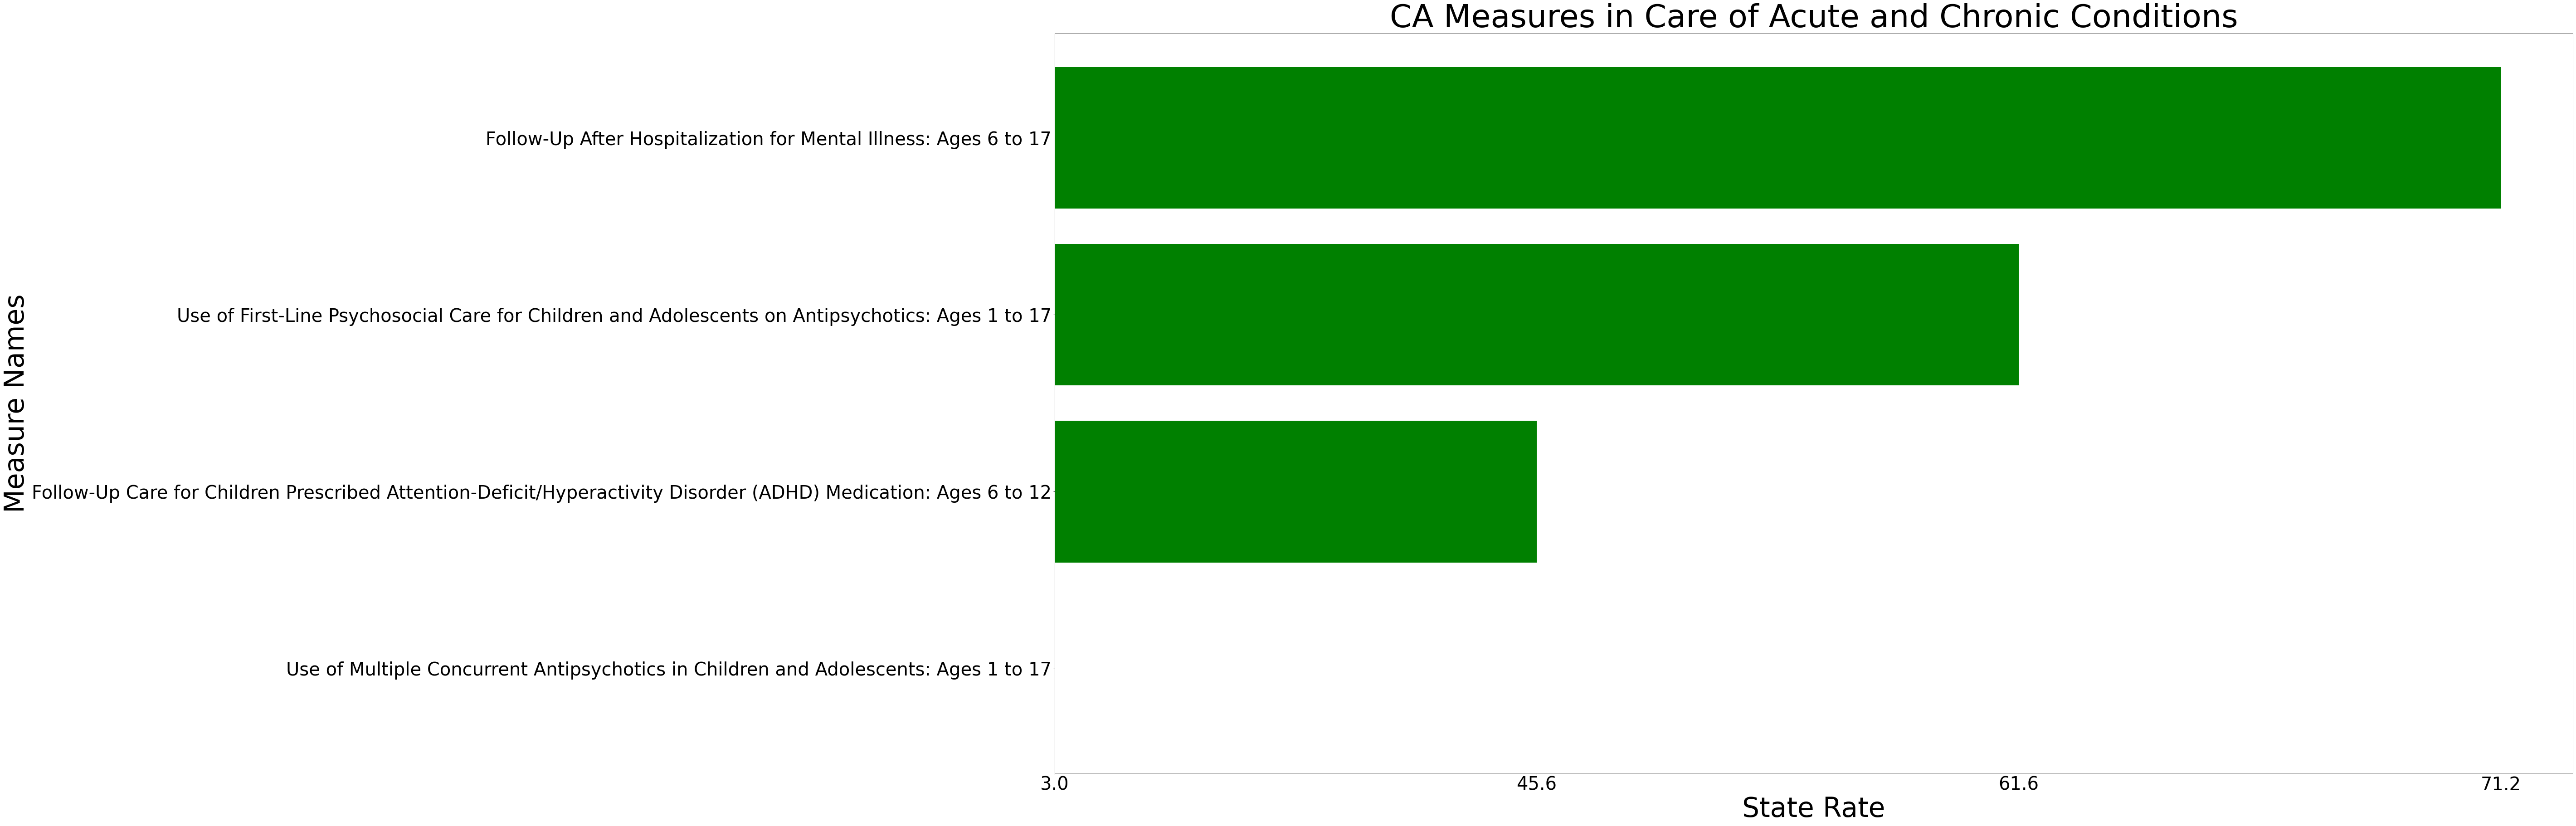

In [101]:
ca_Measures= CA_BHC['MeasureName'].tolist()

ca_rates= CA_BHC['StateRate'].sort_values(ascending=True)

fig= plt.figure(figsize=(60,30))

#Create bar plot 

plt.barh(ca_Measures,ca_rates, color='green')
#plt.xlim(10,80)

plt.xlabel("State Rate", size=60)
plt.ylabel("Measure Names", size= 60)
plt.xticks(size = 40)
plt.yticks(size = 40)
plt.title("CA Measures in Care of Acute and Chronic Conditions", size=70)
plt.show()




In [ ]:
def visualizer(): 
    

In [114]:
fig = px.bar(CA_BHC, 
             y='MeasureName',
             x='StateRate',
             hover_name="Measure Type", 
             hover_data=['Top','Median','Bottom'],
             orientation='h',
             width= 2000 
            
)

fig.update_layout(
    title={
        'text': "CA Measures in Care of Acute and Chronic Conditions",
        'y':0.95,
        'x':0.7,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="State Rate",
    yaxis_title="Measure Names",
 font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))
##fig.update_xaxes(range=[0, 80],tick0=0, dtick=10)
fig.show()